# Univariate Analysis, missing values and outliers

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score, roc_auc_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [4]:
# Read the data file (bank_data.csv) into the dataframe
client_df = pd.read_csv('../data/bank_data.csv')
client_df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Get the shape
client_df.shape

(45211, 17)

In [6]:
# Check the datatypes
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Get the descriptive statistics
client_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
# Number of rows with negative value in the balance column
len(client_df[client_df.balance < 0])

3766

In [9]:
# Get the value counts of the contact column since it is not clear from the first 25 samples from the dataset
client_df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [10]:
# Get the value counts of the poutcome column since it is not clear from the first 25 samples from the dataset
client_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Observations
- There are no missing values.
- The mean age in the dataset is around 41 years, the 75 percentile is 48 years and the max age is 97 indicating the presence of outliers.
- There are 3766 records with a negative balance.

## Plot the categorical and numerical data

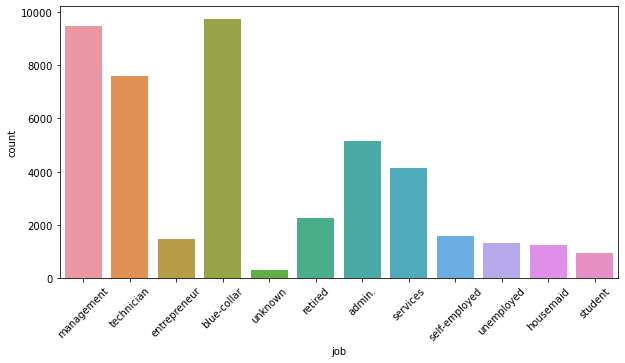

In [11]:
plt.figure(figsize=(10,5))
chart = sns.countplot(client_df['job'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

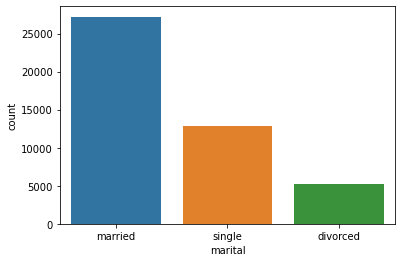

In [12]:
sns.countplot(client_df['marital']);

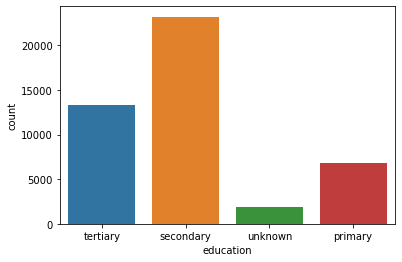

In [13]:
sns.countplot(client_df['education']);

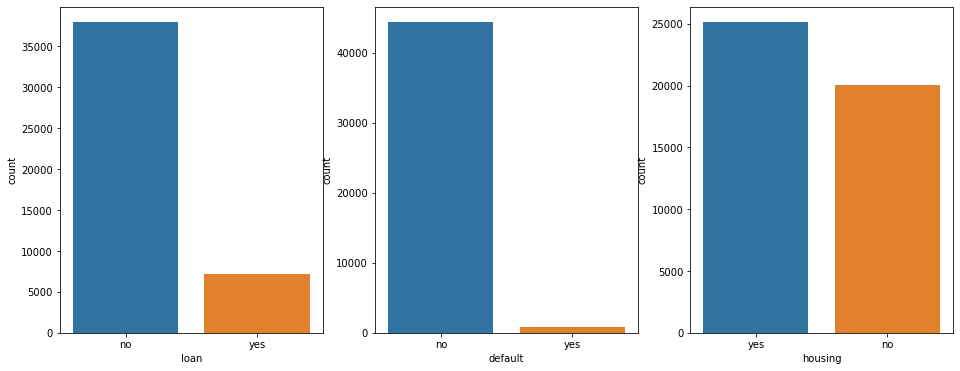

In [14]:
fig,ax =plt.subplots(1,3, figsize=(16,6))
sns.countplot(client_df['loan'], ax=ax[0])
sns.countplot(client_df['default'], ax=ax[1])
sns.countplot(client_df['housing'], ax=ax[2])
fig.show();

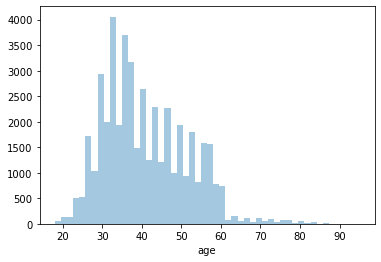

In [15]:
sns.distplot(client_df['age'], kde=False);

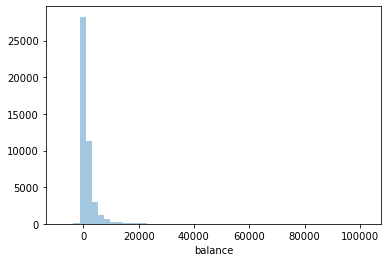

In [16]:
sns.distplot(client_df['balance'], kde=False);

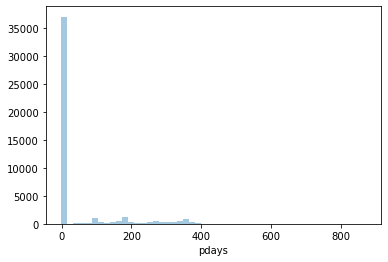

In [17]:
sns.distplot(client_df['pdays'], kde=False);

# Bivariate Analysis

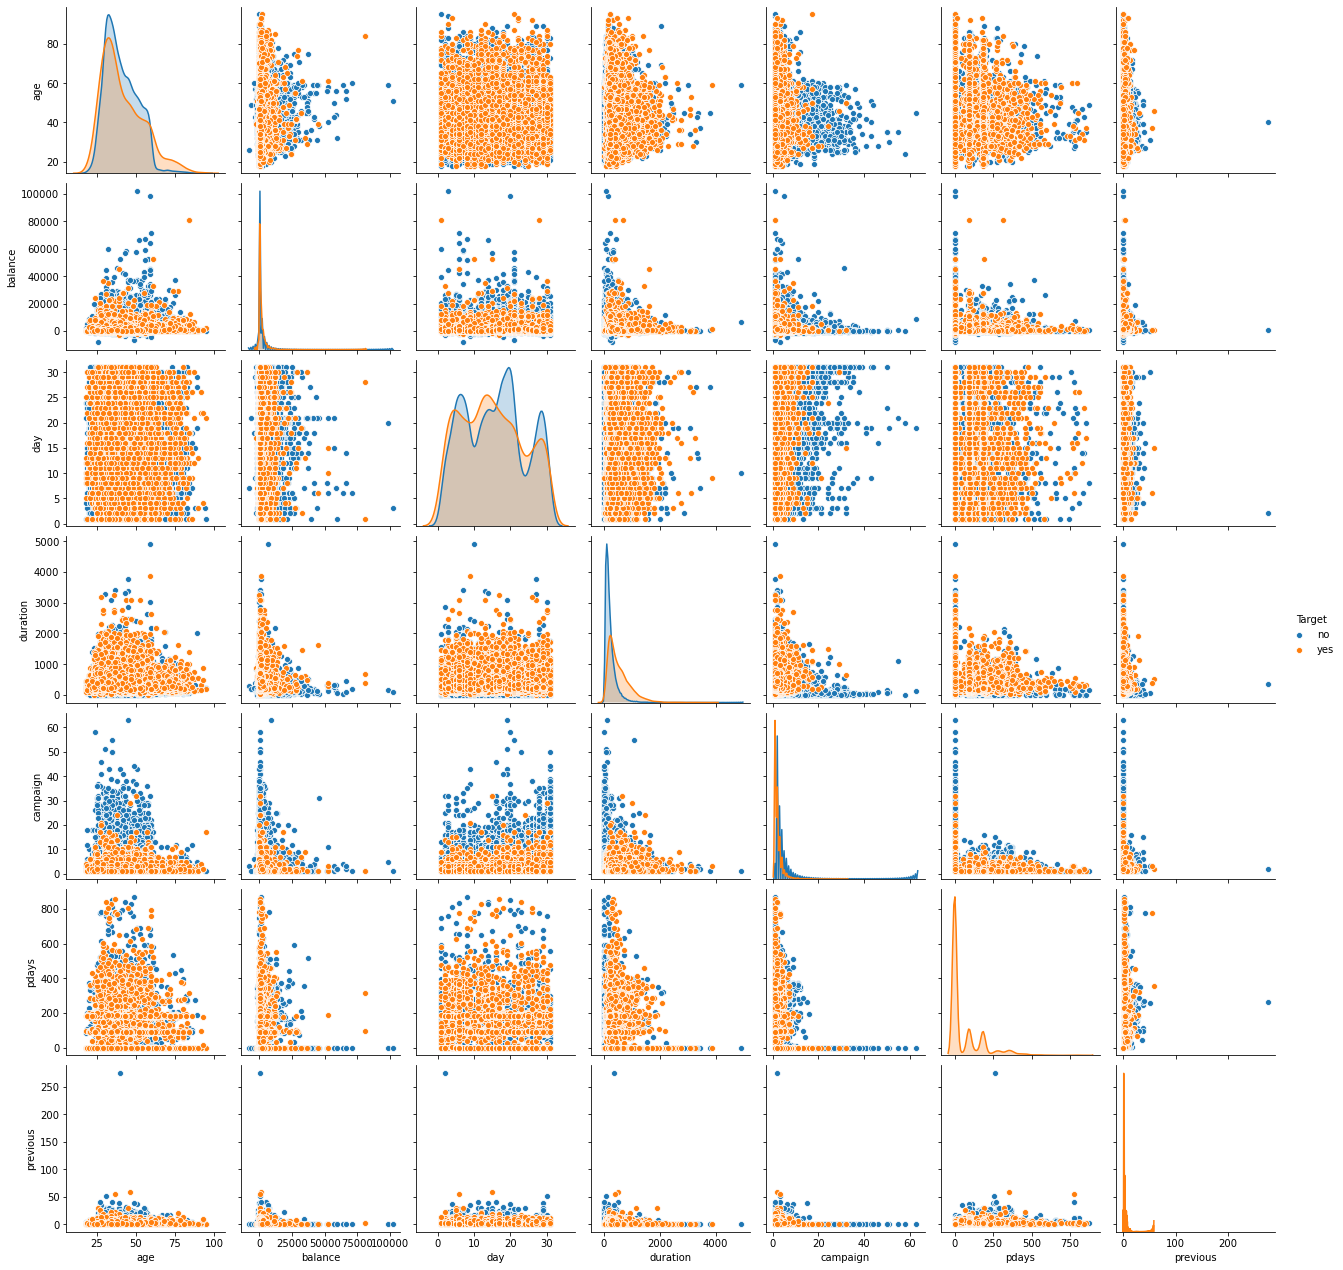

In [18]:
sns.pairplot(data=client_df,hue='Target')

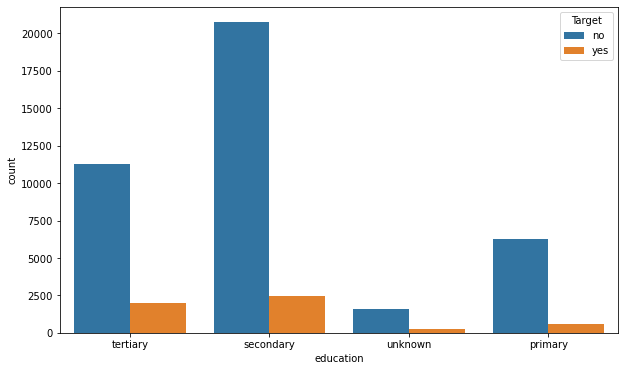

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=client_df, hue='Target')

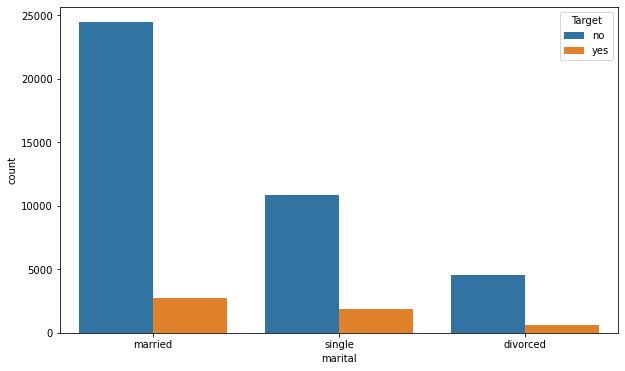

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',data=client_df, hue='Target')

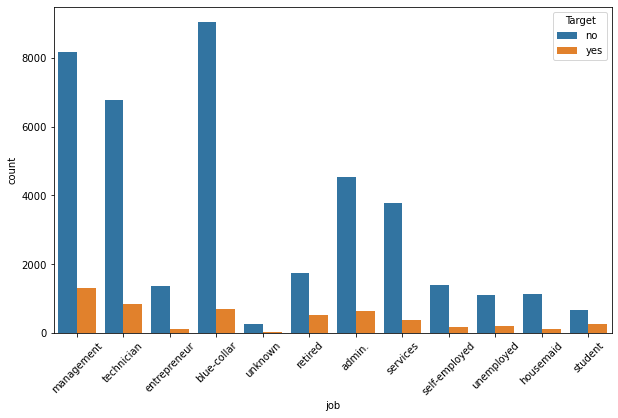

In [21]:
plt.figure(figsize=(10,6))
chart = sns.countplot(x='job',data=client_df, hue='Target')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

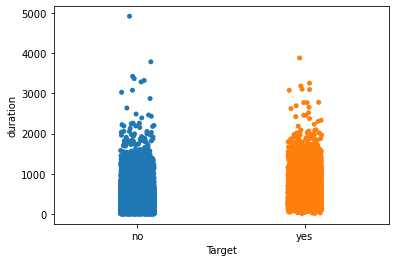

In [22]:
sns.stripplot(x="Target", y="duration", data=client_df)

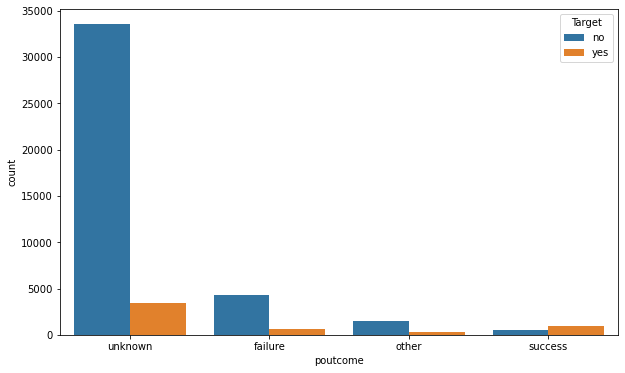

In [23]:
plt.figure(figsize=(10,6))
chart = sns.countplot(x='poutcome',data=client_df, hue='Target')

# Prepare the data for modelling

## Drop the fields that do not provide any insights

In [24]:
# Drop the month and day columns since they do not provide any additional information

client_df.drop('month', axis=1, inplace=True)
client_df.drop('day', axis=1, inplace=True)

In [25]:
client_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


## Handle the fields with object datatypes

In [26]:
client_df['default_numeric'] = client_df['default'].map( {'yes':1, 'no':0} )
client_df['housing_numeric'] = client_df['housing'].map( {'yes':1, 'no':0} )
client_df['loan_numeric'] = client_df['loan'].map( {'yes':1, 'no':0} )
client_df['Target_numeric'] = client_df['Target'].map( {'yes':1, 'no':0} )
client_df.drop('default', axis=1,inplace = True)
client_df.drop('housing', axis=1,inplace = True)
client_df.drop('loan', axis=1,inplace = True)
client_df.drop('Target', axis=1,inplace = True)

In [27]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   balance          45211 non-null  int64 
 5   contact          45211 non-null  object
 6   duration         45211 non-null  int64 
 7   campaign         45211 non-null  int64 
 8   pdays            45211 non-null  int64 
 9   previous         45211 non-null  int64 
 10  poutcome         45211 non-null  object
 11  default_numeric  45211 non-null  int64 
 12  housing_numeric  45211 non-null  int64 
 13  loan_numeric     45211 non-null  int64 
 14  Target_numeric   45211 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 5.2+ MB


In [28]:
# For the poutcome column, combine other and unknown
client_df['poutcome'] = client_df['poutcome'].replace(['other'] , 'unknown')
client_df.poutcome.value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [29]:
client_df = pd.get_dummies(data=client_df, columns = ['job', 'marital', 'education', 'contact','poutcome'])
#client_df = pd.get_dummies(data=client_df, columns = ['job', 'marital', 'education','poutcome'])

In [30]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   default_numeric      45211 non-null  int64
 7   housing_numeric      45211 non-null  int64
 8   loan_numeric         45211 non-null  int64
 9   Target_numeric       45211 non-null  int64
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

## Handle the pdays column

In [31]:
print("Number of clients who haven't been contacted before:", len(client_df[client_df.pdays==-1]))
print("Maximum value of pdays    :", client_df['pdays'].max())

Number of clients who haven't been contacted before: 36954
Maximum value of pdays    : 871


In [32]:
# Replace -1 with a sufficiently large value
client_df.loc[client_df['pdays'] == -1, 'pdays'] = 5000

In [33]:
# Normalize the pdays column
pdays_values = client_df[['pdays']].values
min_max_scaler = preprocessing.MinMaxScaler()
pdays_scaled = min_max_scaler.fit_transform(pdays_values)
client_df['pdays_normalized'] = pd.DataFrame(pdays_scaled)

In [34]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  int64  
 2   duration             45211 non-null  int64  
 3   campaign             45211 non-null  int64  
 4   pdays                45211 non-null  int64  
 5   previous             45211 non-null  int64  
 6   default_numeric      45211 non-null  int64  
 7   housing_numeric      45211 non-null  int64  
 8   loan_numeric         45211 non-null  int64  
 9   Target_numeric       45211 non-null  int64  
 10  job_admin.           45211 non-null  uint8  
 11  job_blue-collar      45211 non-null  uint8  
 12  job_entrepreneur     45211 non-null  uint8  
 13  job_housemaid        45211 non-null  uint8  
 14  job_management       45211 non-null  uint8  
 15  job_retired          45211 non-null 

In [35]:
#Correlation matrix
cm = client_df.corr()

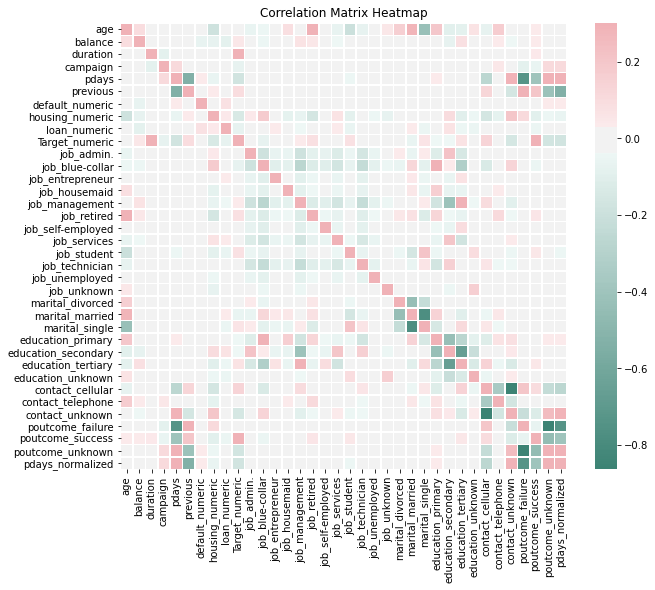

In [36]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(170, 10, as_cmap=True)
sns.heatmap(cm, xticklabels=cm.columns.values, yticklabels=cm.columns.values,cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Correlation Matrix Heatmap');

## Create the train and test sets in the ratio of 70:30

In [37]:
#Separate the dependent variable from the independent variables
X = client_df.drop('Target_numeric',axis=1)
Y = client_df.Target_numeric.astype('category')

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5 )

# Build the models

## Logistic Regression Model

In [39]:
lr = LogisticRegression(random_state=5)
lr.fit(X_train,y_train)

LogisticRegression(random_state=5)

In [40]:
y_predict = lr.predict(X_test)

In [41]:
# Compare the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Target'] = y_test
z['Predicted Target'] = y_predict
z.head(20)

,age,balance,duration,campaign,pdays,previous,default_numeric,housing_numeric,loan_numeric,job_admin.,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_success,poutcome_unknown,pdays_normalized,Observed Target,Predicted Target
6016,43,448,118,6,5000,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,0,0
23977,48,1903,21,6,5000,0,0,0,0,0,...,0,1,0,0,0,0,1,1.000000,0,0
23227,48,98,146,4,5000,0,0,0,0,0,...,0,1,0,0,0,0,1,1.000000,0,0
11884,50,2812,17,37,5000,0,0,1,0,0,...,1,0,0,1,0,0,1,1.000000,0,0
10082,50,0,916,1,5000,0,0,0,0,0,...,0,0,0,1,0,0,1,1.000000,0,1
28667,31,297,229,1,5000,0,0,0,0,0,...,0,1,0,0,0,0,1,1.000000,0,0
2483,60,1262,1015,1,5000,0,0,1,1,0,...,0,0,0,1,0,0,1,1.000000,1,0
4835,32,791,783,2,5000,0,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,1,0
44067,43,4389,632,2,85,1,0,0,0,0,...,1,0,1,0,0,1,0,0.016803,1,1
24192,53,910,156,1,5000,0,0,0,0,0,...,0,1,0,0,0,0,1,1.000000,0,0


In [42]:
print("Training accuracy:",lr.score(X_train,y_train))  
print('\n')
print("Testing accuracy:",lr.score(X_test,y_test))
print('\n')
print("Recall:",recall_score(y_test,y_predict))
print('\n')
print("Precision:",precision_score(y_test,y_predict))
print('\n')
print("F1 Score:",f1_score(y_test,y_predict))
print('\n')
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy: 0.8963882832495971


Testing accuracy: 0.8983338248304334


Recall: 0.29893683552220135


Precision: 0.6494565217391305


F1 Score: 0.40942184154175587


Roc Auc Score: 0.6386869718772729


### Confusion matrix

In [43]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[11707   258]
 [ 1121   478]]


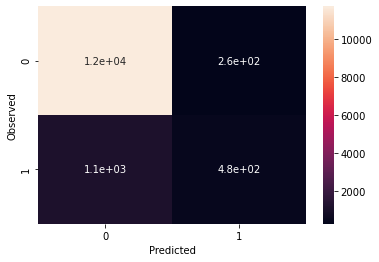

In [44]:
# Plot the confusion matrix as a heat map
sns.heatmap(cm, annot=True)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

### Coefficients of the attributes

In [45]:
coeff_df = pd.DataFrame()
coeff_df['Attribute'] = X_train.columns
coeff_df['Coefficient'] = np.round(abs(lr.coef_[0]),2)
coeff_df.sort_values(by='Coefficient',ascending=False)

,Attribute,Coefficient
7,housing_numeric,1.17
31,poutcome_failure,0.62
30,contact_unknown,0.56
32,poutcome_success,0.44
10,job_blue-collar,0.43
25,education_secondary,0.41
22,marital_married,0.33
8,loan_numeric,0.31
14,job_retired,0.25
26,education_tertiary,0.16


## Decision Tree Model

In [46]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [47]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [49]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8602919492774993

In [50]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=5)

In [51]:
pruned_train = clf_pruned.predict(X_train)
pruned_test = clf_pruned.predict(X_test)

In [52]:
print(accuracy_score(y_train,pruned_train))
print(accuracy_score(y_test,pruned_test))

0.8992321547066072
0.9012828074314362


In [61]:
DT_Accuracy = accuracy_score(y_test, pruned_test)
DT_Recall = recall_score(y_test, pruned_test)

In [62]:
DT_Recall

0.4071294559099437

In [54]:
# Confusion matrix
pd.crosstab(y_test, pruned_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11574,391
1,948,651


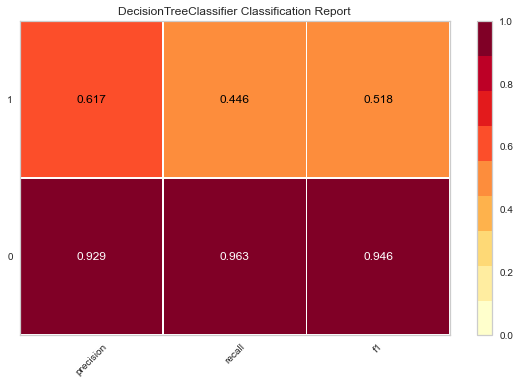

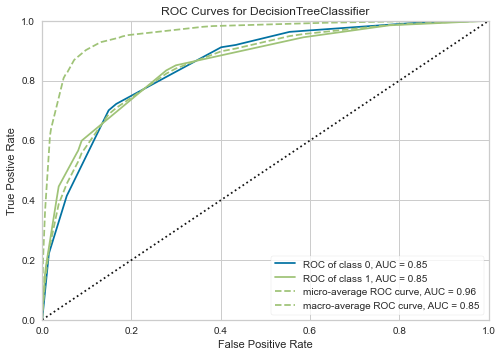

In [55]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [56]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': DT_Accuracy})
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf


,Method,Accuracy
0,Decision Tree,0.901283


## Random Forest Model

In [57]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [59]:
pred_RF_test = rfcl.predict(X_test)
RF_Accuracy = accuracy_score(y_test, pred_RF_test)
RF_Recall = recall_score(y_test, pred_RF_test)

In [880]:
RF_Accuracy

0.9003243880861103

In [60]:
RF_Recall

0.342714196372733

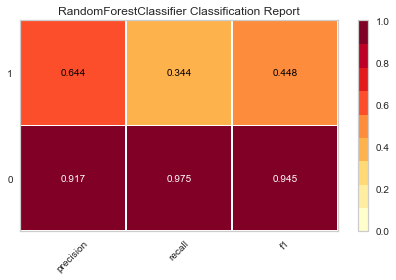

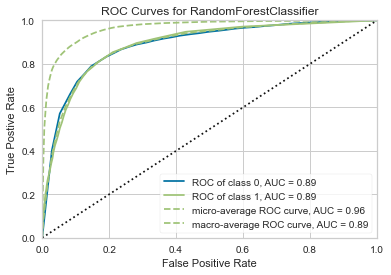

In [881]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [882]:
tmpDF = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [RF_Accuracy]})

In [883]:
resultsDf = pd.concat([resultsDf, tmpDF])

In [884]:
resultsDf

,Method,Accuracy
0,Decision Tree,0.901283
0,Random Forest,0.900324


## Bagging Model

In [885]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=5)
bgcl = bgcl.fit(X_train, y_train)

In [886]:
pred_BC_test = bgcl.predict(X_test)
BC_Accuracy = accuracy_score(y_test, pred_BC_test)

In [887]:
BC_Accuracy

0.8991447950457092

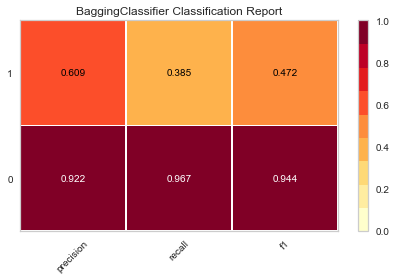

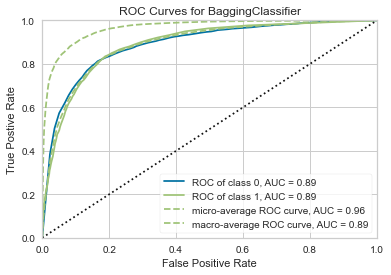

In [902]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [889]:
tmpDF = pd.DataFrame({'Method':['Bagging'], 'Accuracy': [BC_Accuracy]})
resultsDf = pd.concat([resultsDf, tmpDF])

In [890]:
resultsDf

,Method,Accuracy
0,Decision Tree,0.901283
0,Random Forest,0.900324
0,Bagging,0.899145


## Boosting (Adaptive) Model

In [891]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.2, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [892]:
pred_AB_test =abcl.predict(X_test)
AB_Accuracy = accuracy_score(y_test, pred_AB_test)

In [893]:
AB_Accuracy

0.9017251548215865

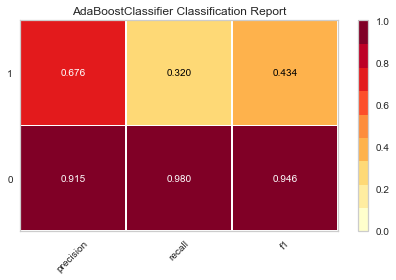

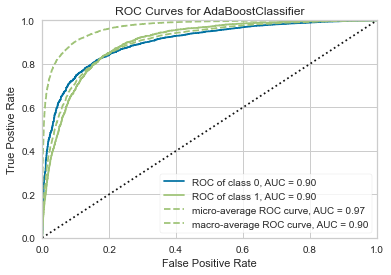

In [901]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.2, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.2, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [894]:
tmpDF = pd.DataFrame({'Method':['Boosting (Adaptive)'], 'Accuracy': [AB_Accuracy]})
resultsDf = pd.concat([resultsDf, tmpDF])
resultsDf

,Method,Accuracy
0,Decision Tree,0.901283
0,Random Forest,0.900324
0,Bagging,0.899145
0,Boosting (Adaptive),0.901725


## Boosting (Gradient) Model

In [897]:
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.2, random_state=22)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=22)

In [898]:
pred_GB_test =gbcl.predict(X_test)
GB_Accuracy = accuracy_score(y_test, pred_GB_test)

In [899]:
GB_Accuracy

0.9056325567679151

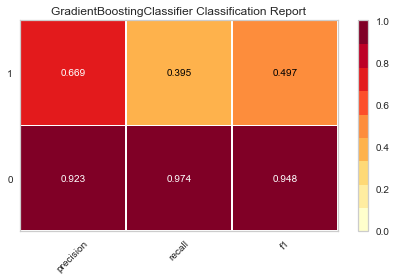

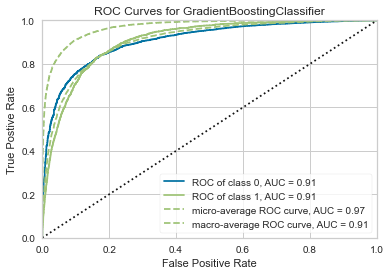

In [900]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

In [903]:
tmpDF = pd.DataFrame({'Method':['Boosting (Gradient)'], 'Accuracy': [GB_Accuracy]})
resultsDf = pd.concat([resultsDf, tmpDF])
resultsDf

,Method,Accuracy
0,Decision Tree,0.901283
0,Random Forest,0.900324
0,Bagging,0.899145
0,Boosting (Adaptive),0.901725
0,Boosting (Gradient),0.905633
